Make sure you write dimesnions using writeDimensions(nx, ny)
2 0.1 40 4


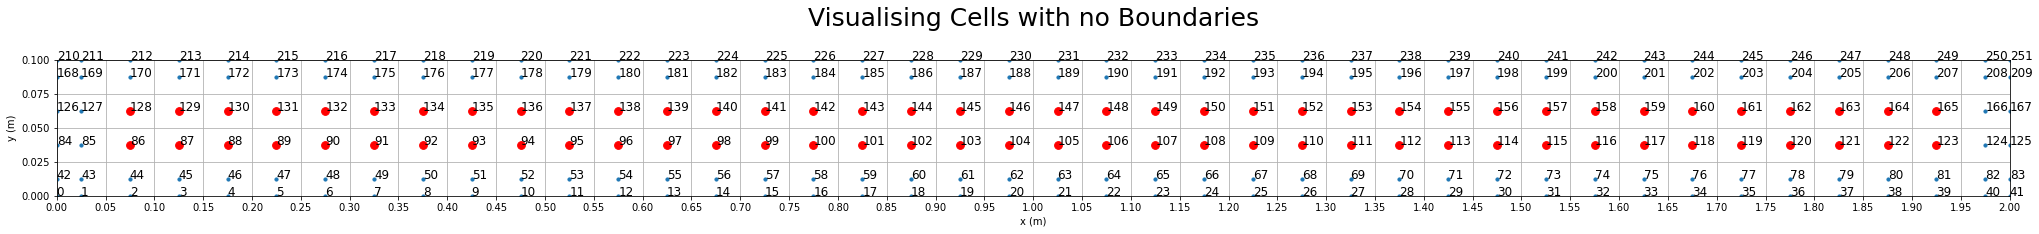

/home/scottlevie/newPythonSolver/python_fv_csm/seperate_notebooks/Background_Functions.ipynb:350: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  "        \n",


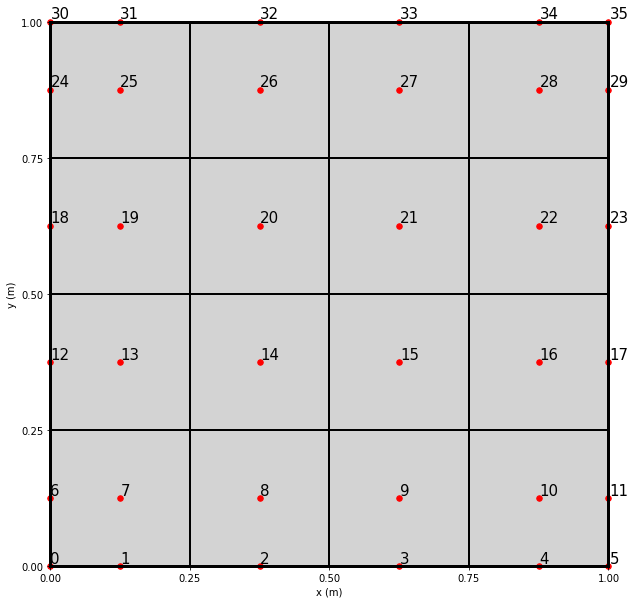

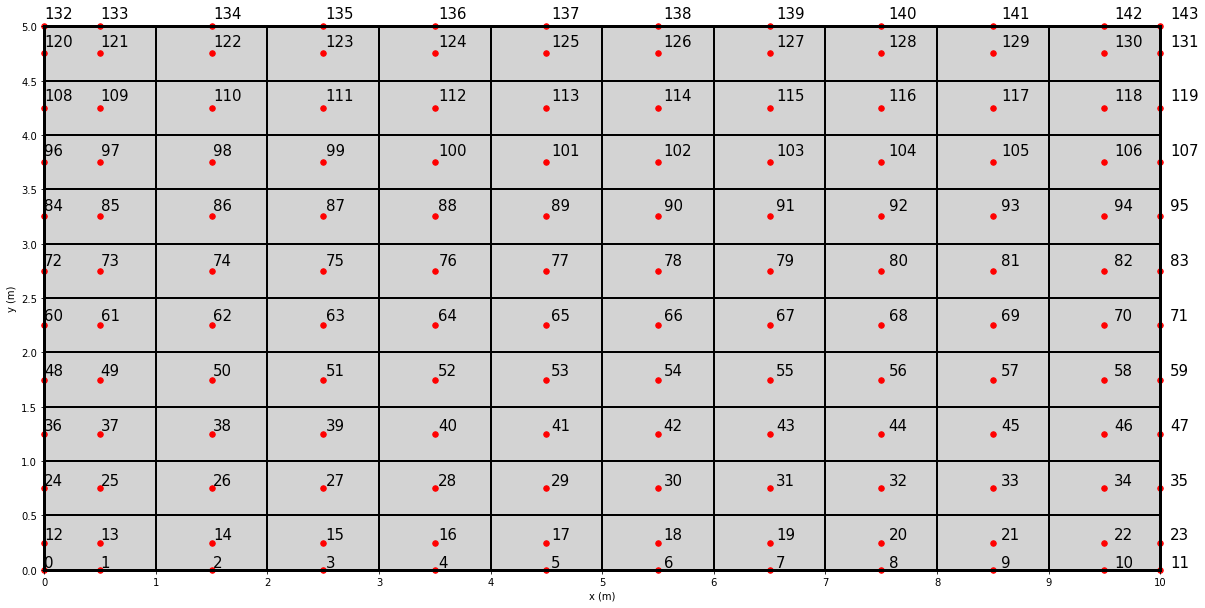

(144, 2)
Number of nodes in Mesh: 144
Number of dimensions: 2
Shear Modulus (mu): 76923076923.07692
Lame Modulus (_lambda): 115384615384.61539
Printing example a-term values for fixed displacement cell on the top boundary:

a_N should be twice the size of a_S
a_E and a_W should be identical

Value for a_N:  307692307692.3077
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  730769230769.2308
Printing a-term values for fixed traction cell on the top boundary:

a_N should 0
a_E and a_W should be identical

Value for a_N:  0
Value for a_S:  153846153846.15384
Value for a_E:  134615384615.38461
Value for a_W:  134615384615.38461
Value for a_P:  423076923076.9231


/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 0,	 Residual = 709614115129721.62500000000000000000,	 normFactor = 0.00000000000000000002
Iteration: 1,	 Residual = 0.50441396253873804767,	 normFactor = 0.00000064999999999996
Iteration: 2,	 Residual = 15.85984787855882593988,	 normFactor = 0.00000064999999999996
Iteration: 3,	 Residual = 0.24957934900925521360,	 normFactor = 0.00000130000000000009
Iteration: 4,	 Residual = 7.76581962333735820181,	 normFactor = 0.00000130000000000009
Iteration: 5,	 Residual = 0.16512772937025116393,	 normFactor = 0.00000194999999999886
Iteration: 6,	 Residual = 5.09613373793854584903,	 normFactor = 0.00000194999999999886


In [1]:
from ipynb.fs.full.Background_Functions import *
from ipynb.fs.full._06_Solution_Algorithm import *

# Ignore outputs from this cell

# Time Loop
***

But what if the problem case changes with time? We will have to perform the momentum loop for each timestep. 

Firstly we'll discretize time:

In [2]:
tf = 2       # Total time in seconds
dt = 0.1     # Time-step size (s)

# Time array
t = np.array(np.arange(0,tf, dt))

print("Time-step array:")
print(t)

Time-step array:
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9]


Now for each timestep we need to perform the momentum loop. This is called the time loop. We also need to activate the <code>transient</code> setting. 

In [3]:
transient = True

Time Loop Structure:

       for timestep in time:

              reset iteration counter

              momentum loop

              # Update variables   
              U_old_old = U_old
              U_old = U_new
                
                  

In [4]:
# initialise fields
b_x = np.zeros([(ny+2)*(nx+2),1])
b_y = np.zeros([(ny+2)*(nx+2),1])

U_new = initalise_U_field(nx, ny)
U_old = initalise_U_field(nx, ny)
U_old_old = initalise_U_field(nx, ny)

For the below time loop the maximum number of iterations will be capped to 10, this will be changed when trying to solve a problem:

In [5]:
# Time loop

# Define momentum loop tolerance:
tolerance = 1e-6

for time in t:

    print("\nTime = " + str(time))
       
    # Reset iteration counter
    icorr = 1

    # Set number of maximum iterations for convergence    
    # This will be increased in following cells
    maxcorr = 10

    # Momentum Loop    
    while True:
        
        # Store solution for previous iteration
        U_previous = U_new 

        # x-equation
        # Create A and b matrices
        A_x = A("x").createMatrix()        
        A_x, b_x = boundary_conditions(A_x, b_x, U_previous, U_old, U_old_old, "x")

        # Solve for u        
        u = spsolve(A_x, b_x)
        u = np.array(u)
        
        # y-equation
        # Create A and b matrices        
        A_y = A("y").createMatrix()
        A_y, b_y = boundary_conditions(A_y, b_y, U_previous, U_old, U_old_old, "y")
        
        # Solve for v
        v = spsolve(A_y, b_y)
        v = np.array(v)
        
        # Update U_New with new u and v fields
        U_new = np.vstack((u, v)).T
       
        # Calculate the residual of each iteration        
        normFactor = np.max(U_new)
        residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor     

        # print values
        print("Iteration: {:01d},\t Residual = {:.20f},\t normFactor = {:.20f}".format(icorr, residual, normFactor))

        # Convergence check
        if residual < tolerance: break
            
        elif icorr > maxcorr: break            
        
        # Increment iteration counter
        icorr = icorr + 1
    
    # Update displacement temporal fields      
    U_old_old = U_old
    U_old = U_new



Time = 0.0
Iteration: 1,	 Residual = 709614115129721.62500000000000000000,	 normFactor = 0.00000000000000000002
Iteration: 2,	 Residual = 0.50441396253873804767,	 normFactor = 0.00000064999999999996
Iteration: 3,	 Residual = 15.85984787855882593988,	 normFactor = 0.00000064999999999996
Iteration: 4,	 Residual = 0.24957934900925521360,	 normFactor = 0.00000130000000000009
Iteration: 5,	 Residual = 7.76581962333735820181,	 normFactor = 0.00000130000000000009
Iteration: 6,	 Residual = 0.16512772937025116393,	 normFactor = 0.00000194999999999886
Iteration: 7,	 Residual = 5.09613373793854584903,	 normFactor = 0.00000194999999999886
Iteration: 8,	 Residual = 0.12306109135377076014,	 normFactor = 0.00000259999999999476
Iteration: 9,	 Residual = 3.77189692917731100863,	 normFactor = 0.00000259999999999476
Iteration: 10,	 Residual = 0.09789809843795413413,	 normFactor = 0.00000324999999997757
Iteration: 11,	 Residual = 2.98263657692800121524,	 normFactor = 0.00000324999999997757

Time = 0.1
It

The following updates to the time loop prints convergence progress report graphs, and saves converged displacement $U$ fields to .csv files. (*The coding of these additions are not important to understand.*)

Now let's allow the time loop to come to convergence for the non-transient problem:

In [6]:
# initialise fields
b_x = np.zeros([(ny+2)*(nx+2),1])
b_y = np.zeros([(ny+2)*(nx+2),1])

# b_x = csr_matrix(((ny+2)*(nx+2), 1))#.toarray()   
# b_y = csr_matrix(((ny+2)*(nx+2), 1))#.toarray()   


U_new = initalise_U_field(nx, ny)
U_old = initalise_U_field(nx, ny)
U_old_old = initalise_U_field(nx, ny)

In [7]:
transient = False

The maximum timesteps is increased to 100000:


Time = 0
Iteration: 100,	 Residual = 0.00824609384836929270,	 normFactor = 0.00003379606386996110,	 Moving Average = 0.51139048674871734335,	 Time = 0.00000
Iteration: 200,	 Residual = 0.00382966178864647391,	 normFactor = 0.00006604045367552533,	 Moving Average = 0.07590890006381439958,	 Time = 0.00000
Iteration: 300,	 Residual = 0.00237679834262115438,	 normFactor = 0.00009715478597288370,	 Moving Average = 0.03927571542926152487,	 Time = 0.00000
Iteration: 400,	 Residual = 0.00166935127379298645,	 normFactor = 0.00012640298255746279,	 Moving Average = 0.02539500885484294659,	 Time = 0.00000
Iteration: 500,	 Residual = 0.00125609544338265615,	 normFactor = 0.00015349852531835429,	 Moving Average = 0.01826436578330455085,	 Time = 0.00000


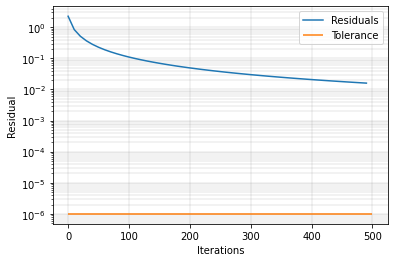

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 600,	 Residual = 0.00098729768785169080,	 normFactor = 0.00017841882572993174,	 Moving Average = 0.01397075026074344299,	 Time = 0.00000
Iteration: 700,	 Residual = 0.00079957188822616179,	 normFactor = 0.00020125796900971751,	 Moving Average = 0.01111665662287344460,	 Time = 0.00000
Iteration: 800,	 Residual = 0.00066169240405006648,	 normFactor = 0.00022215397125237418,	 Moving Average = 0.00908859085097896320,	 Time = 0.00000
Iteration: 900,	 Residual = 0.00055657010842562811,	 normFactor = 0.00024125623144586065,	 Moving Average = 0.00757761624912799223,	 Time = 0.00000
Iteration: 1000,	 Residual = 0.00047409449595315012,	 normFactor = 0.00025871163431634951,	 Moving Average = 0.00641184550550194087,	 Time = 0.00000


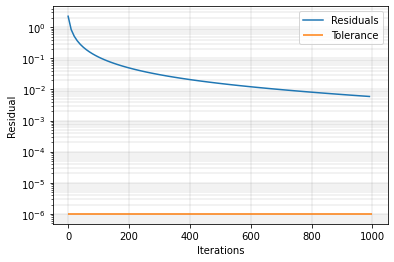

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 1100,	 Residual = 0.00040791216961497053,	 normFactor = 0.00027465899825496626,	 Moving Average = 0.00548810492406353722,	 Time = 0.00000
Iteration: 1200,	 Residual = 0.00035383402410817404,	 normFactor = 0.00028922719864846338,	 Moving Average = 0.00474068076085362375,	 Time = 0.00000
Iteration: 1300,	 Residual = 0.00030898743364378954,	 normFactor = 0.00030253487981476968,	 Moving Average = 0.00412569050989518814,	 Time = 0.00000
Iteration: 1400,	 Residual = 0.00027133723669651804,	 normFactor = 0.00031469082818468588,	 Moving Average = 0.00361268318376759944,	 Time = 0.00000
Iteration: 1500,	 Residual = 0.00023940138354186532,	 normFactor = 0.00032579459704469338,	 Moving Average = 0.00317984839682015040,	 Time = 0.00000


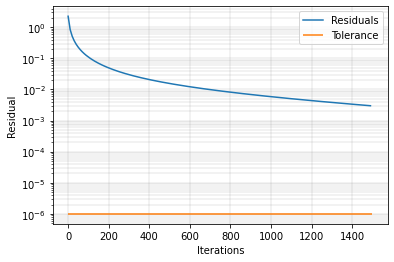

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 1600,	 Residual = 0.00021207496375611035,	 normFactor = 0.00033593720383011199,	 Moving Average = 0.00281114479859698131,	 Time = 0.00000
Iteration: 1700,	 Residual = 0.00018851736258116024,	 normFactor = 0.00034520182354951358,	 Moving Average = 0.00249450543262729699,	 Time = 0.00000
Iteration: 1800,	 Residual = 0.00016807764154786099,	 normFactor = 0.00035366444738089362,	 Moving Average = 0.00222067555698553677,	 Time = 0.00000
Iteration: 1900,	 Residual = 0.00015024385546403513,	 normFactor = 0.00036139449549623277,	 Moving Average = 0.00198243674136038949,	 Time = 0.00000
Iteration: 2000,	 Residual = 0.00013460780665539463,	 normFactor = 0.00036845538185454897,	 Moving Average = 0.00177407500597179528,	 Time = 0.00000


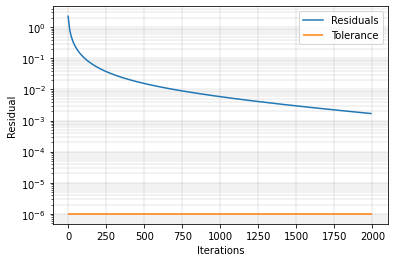

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 2100,	 Residual = 0.00012084001740805728,	 normFactor = 0.00037490503233473507,	 Moving Average = 0.00159100774858225930,	 Time = 0.00000
Iteration: 2200,	 Residual = 0.00010867162412805355,	 normFactor = 0.00038079635901848831,	 Moving Average = 0.00142951668747702651,	 Time = 0.00000
Iteration: 2300,	 Residual = 0.00009788105812711957,	 normFactor = 0.00038617769385719086,	 Moving Average = 0.00128655321582231853,	 Time = 0.00000
Iteration: 2400,	 Residual = 0.00008828409860606876,	 normFactor = 0.00039109318499984684,	 Moving Average = 0.00115959422479377833,	 Time = 0.00000
Iteration: 2500,	 Residual = 0.00007972634160998095,	 normFactor = 0.00039558315889793054,	 Moving Average = 0.00104653374447108405,	 Time = 0.00000


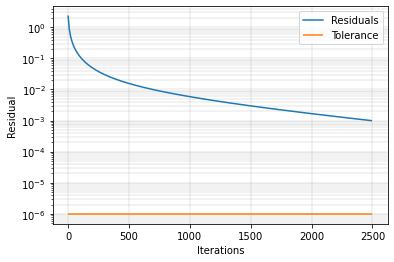

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 2600,	 Residual = 0.00007207742650187387,	 normFactor = 0.00039968445110551783,	 Moving Average = 0.00094560042232136766,	 Time = 0.00000
Iteration: 2700,	 Residual = 0.00006522655885533204,	 normFactor = 0.00040343070845995420,	 Moving Average = 0.00085529391731877294,	 Time = 0.00000
Iteration: 2800,	 Residual = 0.00005907900190851713,	 normFactor = 0.00040685266511223002,	 Moving Average = 0.00077433532975370049,	 Time = 0.00000
Iteration: 2900,	 Residual = 0.00005355330018955334,	 normFactor = 0.00040997839466445202,	 Moving Average = 0.00070162817490439884,	 Time = 0.00000
Iteration: 3000,	 Residual = 0.00004857906261711467,	 normFactor = 0.00041283354048415730,	 Moving Average = 0.00063622736768709925,	 Time = 0.00000


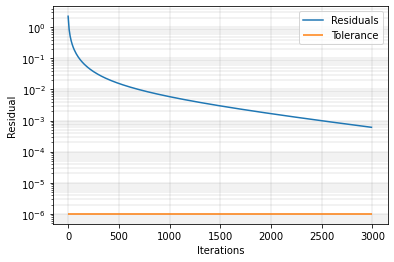

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 3100,	 Residual = 0.00004409517742490036,	 normFactor = 0.00041544152608099843,	 Moving Average = 0.00057731435793018939,	 Time = 0.00000
Iteration: 3200,	 Residual = 0.00004004836352179734,	 normFactor = 0.00041782374727134680,	 Moving Average = 0.00052417703398183679,	 Time = 0.00000
Iteration: 3300,	 Residual = 0.00003639198622595428,	 normFactor = 0.00041999974770856217,	 Moving Average = 0.00047619335652436138,	 Time = 0.00000
Iteration: 3400,	 Residual = 0.00003308508246668895,	 normFactor = 0.00042198737921860625,	 Moving Average = 0.00043281793518943408,	 Time = 0.00000
Iteration: 3500,	 Residual = 0.00003009155321262361,	 normFactor = 0.00042380294825688689,	 Moving Average = 0.00039357094516846448,	 Time = 0.00000


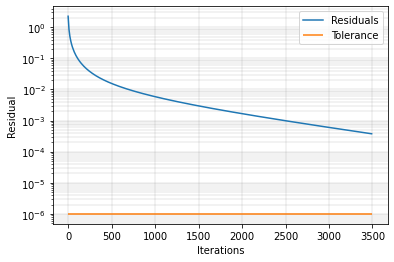

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 3600,	 Residual = 0.00002737949036056158,	 normFactor = 0.00042546134968381475,	 Moving Average = 0.00035802891831093845,	 Time = 0.00000
Iteration: 3700,	 Residual = 0.00002492061246881174,	 normFactor = 0.00042697618896249151,	 Moving Average = 0.00032581704637213422,	 Time = 0.00000
Iteration: 3800,	 Residual = 0.00002268978918836292,	 normFactor = 0.00042835989377794121,	 Moving Average = 0.00029660271210205227,	 Time = 0.00000
Iteration: 3900,	 Residual = 0.00002066463837205123,	 normFactor = 0.00042962381599303499,	 Moving Average = 0.00027009002364572206,	 Time = 0.00000
Iteration: 4000,	 Residual = 0.00001882518312911612,	 normFactor = 0.00043077832477786664,	 Moving Average = 0.00024601517358057025,	 Time = 0.00000


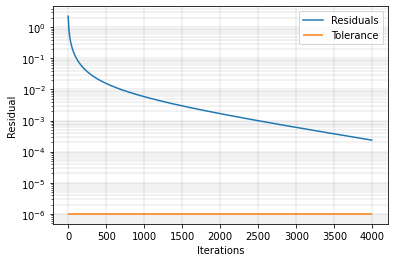

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 4100,	 Residual = 0.00001715355854390236,	 normFactor = 0.00043183289168034756,	 Moving Average = 0.00022414247960656311,	 Time = 0.00000
Iteration: 4200,	 Residual = 0.00001563375980151641,	 normFactor = 0.00043279616832727686,	 Moving Average = 0.00020426099169315817,	 Time = 0.00000
Iteration: 4300,	 Residual = 0.00001425142498177498,	 normFactor = 0.00043367605740445177,	 Moving Average = 0.00018618157239818140,	 Time = 0.00000
Iteration: 4400,	 Residual = 0.00001299364701574667,	 normFactor = 0.00043447977748881490,	 Moving Average = 0.00016973437433966205,	 Time = 0.00000
Iteration: 4500,	 Residual = 0.00001184881031461417,	 normFactor = 0.00043521392227040517,	 Moving Average = 0.00015476665262135927,	 Time = 0.00000


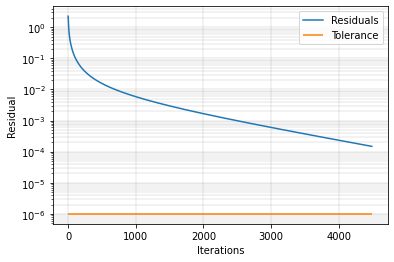

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 4600,	 Residual = 0.00001080644832730037,	 normFactor = 0.00043588451464536733,	 Moving Average = 0.00014114086094961154,	 Time = 0.00000
Iteration: 4700,	 Residual = 0.00000985711894952124,	 normFactor = 0.00043649705612850109,	 Moving Average = 0.00012873298913939133,	 Time = 0.00000
Iteration: 4800,	 Residual = 0.00000899229521269062,	 normFactor = 0.00043705657198711838,	 Moving Average = 0.00011743110679471841,	 Time = 0.00000
Iteration: 4900,	 Residual = 0.00000820426910552848,	 normFactor = 0.00043756765246868805,	 Moving Average = 0.00010713408380271025,	 Time = 0.00000
Iteration: 5000,	 Residual = 0.00000748606671226235,	 normFactor = 0.00043803449045851073,	 Moving Average = 0.00009775046303511142,	 Time = 0.00000


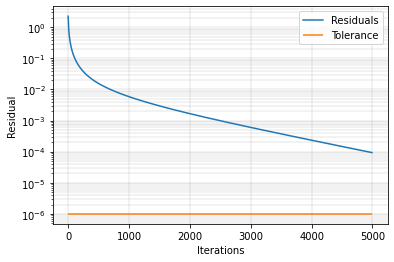

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 5100,	 Residual = 0.00000683137315804910,	 normFactor = 0.00043846091587759403,	 Moving Average = 0.00008919746454976622,	 Time = 0.00000
Iteration: 5200,	 Residual = 0.00000623446606164666,	 normFactor = 0.00043885042710436773,	 Moving Average = 0.00008140010377139301,	 Time = 0.00000
Iteration: 5300,	 Residual = 0.00000569015640152642,	 normFactor = 0.00043920621967435730,	 Moving Average = 0.00007429040881331451,	 Time = 0.00000
Iteration: 5400,	 Residual = 0.00000519373586286485,	 normFactor = 0.00043953121249675593,	 Moving Average = 0.00006780672430113844,	 Time = 0.00000
Iteration: 5500,	 Residual = 0.00000474092986291436,	 normFactor = 0.00043982807180034493,	 Moving Average = 0.00006189309088544436,	 Time = 0.00000


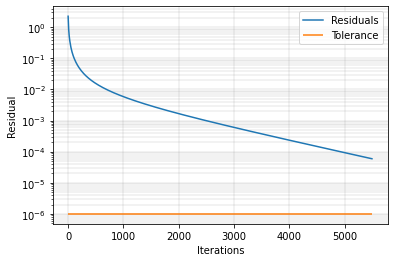

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 5600,	 Residual = 0.00000432785556081417,	 normFactor = 0.00044009923300764226,	 Moving Average = 0.00005649869116478631,	 Time = 0.00000
Iteration: 5700,	 Residual = 0.00000395098427243641,	 normFactor = 0.00044034692071536695,	 Moving Average = 0.00005157735406346727,	 Time = 0.00000
Iteration: 5800,	 Residual = 0.00000360710775718465,	 normFactor = 0.00044057316694408582,	 Moving Average = 0.00004708711076351843,	 Time = 0.00000
Iteration: 5900,	 Residual = 0.00000329330795597632,	 normFactor = 0.00044077982780947909,	 Moving Average = 0.00004298979622814413,	 Time = 0.00000
Iteration: 6000,	 Residual = 0.00000300692976795256,	 normFactor = 0.00044096859874929046,	 Moving Average = 0.00003925069112391730,	 Time = 0.00000


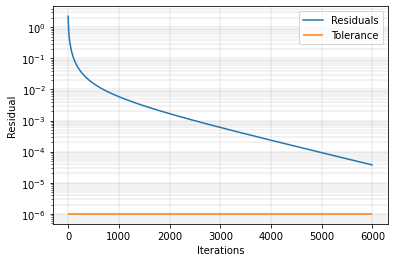

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 6100,	 Residual = 0.00000274555654543976,	 normFactor = 0.00044114102843363732,	 Moving Average = 0.00003583819964797088,	 Time = 0.00000
Iteration: 6200,	 Residual = 0.00000250698800763324,	 normFactor = 0.00044129853146943586,	 Moving Average = 0.00003272355929339780,	 Time = 0.00000
Iteration: 6300,	 Residual = 0.00000228922030385289,	 normFactor = 0.00044144240000473615,	 Moving Average = 0.00002988057908750371,	 Time = 0.00000
Iteration: 6400,	 Residual = 0.00000209042801424780,	 normFactor = 0.00044157381433241011,	 Moving Average = 0.00002728540328946755,	 Time = 0.00000
Iteration: 6500,	 Residual = 0.00000190894786811282,	 normFactor = 0.00044169385257052839,	 Moving Average = 0.00002491629784358263,	 Time = 0.00000


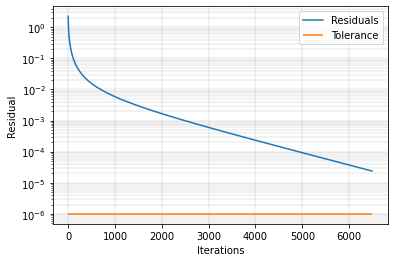

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 6600,	 Residual = 0.00000174326401888001,	 normFactor = 0.00044180349950842605,	 Moving Average = 0.00002275345724660841,	 Time = 0.00000
Iteration: 6700,	 Residual = 0.00000159199470670887,	 normFactor = 0.00044190365468520844,	 Moving Average = 0.00002077882971533131,	 Time = 0.00000
Iteration: 6800,	 Residual = 0.00000145388017245657,	 normFactor = 0.00044199513977044715,	 Moving Average = 0.00001897595882086605,	 Time = 0.00000
Iteration: 6900,	 Residual = 0.00000132777169566870,	 normFactor = 0.00044207870530421845,	 Moving Average = 0.00001732983992776283,	 Time = 0.00000
Iteration: 7000,	 Residual = 0.00000121262165753978,	 normFactor = 0.00044215503685520927,	 Moving Average = 0.00001582678997340318,	 Time = 0.00000


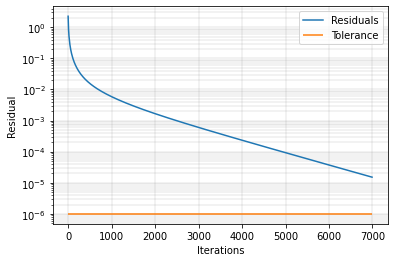

/home/scottlevie/miniconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Iteration: 7100,	 Residual = 0.00000110747450311702,	 normFactor = 0.00044222476064438305,	 Moving Average = 0.00001445432928874548,	 Time = 0.00000
Iteration: 7200,	 Residual = 0.00000101145855037865,	 normFactor = 0.00044228844868311978,	 Moving Average = 0.00001320107426868694,	 Time = 0.00000

Residuals have converged:

Iteration: 7214,	 Residual = 0.00000099869883482572,	 normFactor = 0.00044229691367036382,	 Moving Average = 0.00001320107426868694,	 Time = 0.00000

Time = 1

Residuals have converged:

Iteration: 2,	 Residual = 0.00000099688922548390,	 normFactor = 0.00044229811421845879,	 Moving Average = 0.00001320107426868694,	 Time = 1.00000
Run time:  392.88038463599514


In [9]:
# Time loop

!rm -r Solution
! mkdir Solution

import timeit
start = timeit.default_timer()

# Define momentum loop tolerance:
tolerance = 1e-6

# Only allow one time-step if non transient
if not transient:
    t = np.array([0,1])

for time in t:

    print("\nTime = " + str(round(time, 1)))
    
    # Reset iteration counter
    icorr = 1

    # Set number of maximum iterations for convergence    
    maxcorr = 100000

    # Make directory for timestep
    ! mkdir Solution/{str(round(time, 1))}

    # Initialise arrays for graphs
    residual_array = np.array([])
    moving_average_array = np.array([])
    moving_average_graph_array = np.array([])

    # Momentum Loop    
    while True:
        
        # Store solution for previous iteration
        U_previous = U_new 

        # x-equation
        # Create A and b matrices
        A_x = A("x").createMatrix()        
        A_x, b_x = boundary_conditions(A_x, b_x, U_previous, U_old, U_old_old, "x")

        # Solve for u        
        u = spsolve(A_x, b_x)
        u = np.array(u)
        
        # y-equation
        # Create A and b matrices        
        A_y = A("y").createMatrix()
        A_y, b_y = boundary_conditions(A_y, b_y, U_previous, U_old, U_old_old, "y")
        
        # Solve for v
        v = spsolve(A_y, b_y)
        v = np.array(v)
        
        # Update U_New with new u and v fields
        U_new = np.vstack((u, v)).T
       
        # Calculate the residual of each iteration        
        normFactor = np.max(U_new)
        residual = math.sqrt(np.mean((U_new - U_previous)**2))/normFactor

        # Append residual array with residual
        residual_array = np.append(residual_array, residual)

        # The following is for on-going convergence reports:
        # Print out residual every 100 iterations
        if icorr%100 == 0 :
            moving_average = np.mean(residual_array[len(residual_array)-100 :len(residual_array) ])
            moving_average_array = np.append(moving_average_array, moving_average)
            print("Iteration: {:01d},\t Residual = {:.20f},\t normFactor = {:.20f},\t Moving Average = {:.20f},\t Time = {:.5f}".format(icorr, residual, normFactor, moving_average, time))

        # Calculate moving average of residual
        if icorr%10 == 0 :
            moving_average_graph = np.mean(residual_array[len(residual_array)-10 :len(residual_array) ])
            moving_average_graph_array = np.append(moving_average_graph_array, moving_average_graph)

        # Print residual progress every 500 iterations
        if icorr % 500 == 0:

            # plt.plot(np.arange(0, len(residual_array)), residual_array, label = "Residuals")
            plt.plot(np.arange(0, len(moving_average_graph_array)*10, 10), moving_average_graph_array, label = "Residuals")
            # plt.scatter((len(moving_average_graph_array)-50)*10, moving_average_graph_array[len(moving_average_graph_array)-50], color = "C1", label  = "Residual 500 iterations ago")
            plt.hlines(tolerance, 0, len(moving_average_graph_array)*10, color = "C1", label  = "Tolerance")
            plt.yscale("log")
            plt.xlabel("Iterations")
            plt.ylabel("Residual")
            plt.legend()
            plt.grid(True, linestyle = "-",  which="both", color = "grey", linewidth = 0.2)
            plt.show()
        

        # Convergence check
        if residual < tolerance:

            print("\nResiduals have converged:\n")            
            print("Iteration: {:01d},\t Residual = {:.20f},\t normFactor = {:.20f},\t Moving Average = {:.20f},\t Time = {:.5f}".format(icorr, residual, normFactor, moving_average, time))

            break
            
        elif icorr > maxcorr:
            
            break            
        
        # Increment iteration counter
        icorr = icorr + 1
    
    # Update displacement temporal fields      
    U_old_old = U_old
    U_old = U_new

    # Save displacement field
    saveArray(str(round(time, 1)) + "/U" , U_new)

stop = timeit.default_timer()

print('Run time: ', stop - start)

As you can see the residuals for the momentum loop converge after approximately 7200 iterations. These results will be analysed in the next notebook.